In [45]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.nn.functional as F # import convolution functions like Relu
import matplotlib.pyplot as plt   # https://matplotlib.org/tutorials/introductory/pyplot.html
import numpy as np


## CPU oder GPU?
Torch erlaubt das Ausführen (vor allem der aufwändigen Lernphase) des künstlichen neuronalen Netzes auf CPU oder GPU. Ob die GPU zur Verfügung steht hängt von dem installierten Python-Paket und der Unterstützung der Grafikkarte durch Torch ab.

In [2]:

# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


## Knünstliches Neuronale Netzwerke in Torch
In Torch werden neuronale Netzwerke wie durch Python-Klassen repräsentiert, die von der Klasse nn.Module erben.
Diese beinhalten die Netztopologie sowie die Berechnungsart.

In [3]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [4]:
# Define model
class NeuralNetworkSigmoid(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.Sigmoid(),
            nn.Linear(512, 512),
            nn.Sigmoid(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [5]:
# Define model
class NeuralNetworkTanh(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.Tanh(),
            nn.Linear(512, 512),
            nn.Tanh(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [6]:
# Define model
class DeepNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [7]:
# Define model
class SmallerNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 30),
            nn.ReLU(),
            nn.Linear(30, 30),
            nn.ReLU(),
            nn.Linear(30, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [8]:
# Define model
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [34]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(in_channels=1,out_channels=7,kernel_size=5,padding=2,),   #in_channels=1,out_channels=16,kernel_size=5,padding=2,                           
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=4), #2   
        )
        self.out = nn.Linear(7 * 7 * 7, 10) #16 * 14 * 14, 10
    def forward(self, x):
        x = self.conv1(x)
        x = self.flatten(x)     
        output = self.out(x)
        return output

In [10]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.Tanh(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [11]:
# Define model
class NNReluTanh(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.Tanh(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [12]:
# Define model
class NeuralNetwork64(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 64),
            nn.Tanh(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [13]:
# Define model
class TanhDNN6(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.Tanh(),
            nn.Linear(512, 512),
            nn.Tanh(),
            nn.Linear(512, 512),
            nn.Tanh(),
            nn.Linear(512, 512),
            nn.Tanh(),
            nn.Linear(512, 512),
            nn.Tanh(),
            nn.Linear(512, 512),
            nn.Tanh(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [14]:
# Define model
class TanhDNN5(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.Tanh(),
            nn.Linear(512, 512),
            nn.Tanh(),
            nn.Linear(512, 512),
            nn.Tanh(),
            nn.Linear(512, 512),
            nn.Tanh(),
            nn.Linear(512, 512),
            nn.Tanh(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [15]:
# Define model
class TanhDNN4(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.Tanh(),
            nn.Linear(512, 512),
            nn.Tanh(),
            nn.Linear(512, 512),
            nn.Tanh(),
            nn.Linear(512, 512),
            nn.Tanh(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [16]:
# Define model
class TanhDNN3(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.Tanh(),
            nn.Linear(512, 512),
            nn.Tanh(),
            nn.Linear(512, 512),
            nn.Tanh(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

## Training des Netzes
Das Training eines Netzes definiert man am besten als eigene Funktion. Das Training folgt hierbei dem bereits aus der Vorlesung bekannten Backpropagation-Verfahren. Die Art der Optimierung, der ```optimizer```, kann durch verschiedene bereits implementierte Optimierer bestimmt werden. Siehe hierzu auch den Aufruf in der ```main()``` Methode 

In [17]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

## Testing
Auch das Testing ist am besten als Funktion zu kapseln. Hierbei wird das aktuelle ```model```, also das aktuelle künstliche neuronale Netz mit den Testdaten geprüft. Diese dürfen nicht Teil des Trainings sein. 

In [18]:
def test(dataloader, model, loss_fn):
    # Get the size of the dataset and the number of batches
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    
    # Set the model to evaluation mode
    model.eval()
    
    # Initialize variables to store test loss and correct predictions
    test_loss, correct = 0, 0
    
    # Lists to store details about misclassified samples
    misclassified_samples = []
    
    # Disable gradient computation during testing
    with torch.no_grad():
        # Iterate over batches in the dataloader
        for set, (X, y) in enumerate(dataloader, 1):  # Adding 1 to start indexing from 1
            # Move input data and labels to the device (e.g., GPU)
            X, y = X.to(device), y.to(device)
            
            # Forward pass to get predictions from the model
            pred = model(X)
            
            # Compute the test loss using the specified loss function
            test_loss += loss_fn(pred, y).item()
            
            # Count the number of correct predictions
            pred_argmax = pred.argmax(1)
            comparison = pred_argmax == y
            correct += (comparison).type(torch.float).sum().item()

            # y_list = y.tolist()
            # pred_list = pred.argmax(1).tolist()

            # for i in range(len(y_list)):
            #     # Check if the prediction is correct
            #     if pred_list[i] != y_list[i]:
            #         # Save details about misclassified sample
            #         misclassified_samples.append({
            #             'set': set,
            #             'index': i,
            #             'expected_label': y_list[i],
            #             'predicted_label': pred_list[i]
            #         })

    # Calculate average test loss and accuracy
    test_loss /= num_batches
    correct /= size
    
    # Print the test results
    accuracy = 100*correct
    print(f"Test Error: \n Accuracy: {accuracy:>0.1f}%, Avg loss: {test_loss:>8f} \n")

    # Print details about misclassified samples
    # if misclassified_samples:
    #     print("Misclassified Samples:")
    #     for sample in misclassified_samples:
    #         print(f"Set {sample['set']} Index {sample['index']}: Expected {sample['expected_label']}, Predicted {sample['predicted_label']}")
    # else:
    #     print("All samples classified correctly.")
    
    return accuracy, test_loss # test result


## Die Hauptroutine
Hier passiert alles:
1. Die MNIST-Daten werden geladen und in Trainings- und Testdaten aufgeteilt
2. Die Lernparameter und Optimierungsstrategien werden festgelegt
3. Das Lernen erfolgt, gefolgt von einer Testphase pro Epoche.
4. Das Netz wird abgespeichert (so kann es schnell wieder geladen werden, ohne dass ein erneutes Training erfolgt)

In [42]:
def main(model):
    # Download training data from open datasets.
    training_data = datasets.MNIST(
        root="data",
        train=True,
        download=True,
        transform=ToTensor(),
    )

    # Download test data from open datasets.
    test_data = datasets.MNIST(
        root="data",
        train=False,
        download=True,
        transform=ToTensor(),
    )

    batch_size = 64

    # Create data loaders.
    train_dataloader = DataLoader(training_data, batch_size=batch_size)
    test_dataloader = DataLoader(test_data, batch_size=batch_size)

    for X, y in test_dataloader:
        print(f"Shape of X [N, C, H, W]: {X.shape}")
        print(f"Shape of y: {y.shape} {y.dtype}")
        break

    # model = NeuralNetwork().to(device)
    print(model)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    
    epochs = 10
    accuracies = []
    losses = []
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        train(train_dataloader, model, loss_fn, optimizer)
        accuracy, loss = test(test_dataloader, model, loss_fn)
        accuracies.append(accuracy)
        losses.append(loss)
    print("Done!")

    torch.save(model.state_dict(), "model.pth")
    print("Saved PyTorch Model State to model.pth")

    #model = NeuralNetwork().to(device)
    #model.load_state_dict(torch.load("model.pth"))

    classes = test_data.classes

    return accuracies, losses

In [20]:
# accuracies, losses = main(NeuralNetwork().to(device)) # Accuracy: 97.8%, Avg loss: 0.071891

In [21]:
#accuraciesSNN, lossesSNN = main(SmallerNeuralNetwork().to(device)) # Accuracy: 96.4%, Avg loss: 0.122912

In [22]:
#accuraciesDNN, lossesDNN = main(DeepNeuralNetwork().to(device)) # Accuracy: 97.4%, Avg loss: 0.106785

In [23]:
#accuraciesSimpleNN, lossesSimpleNN = main(SimpleNN().to(device)) # Accuracy: 97.3%, Avg loss: 0.087829 

In [24]:
#accuraciesSigmoid, lossesSigmoid = main(NeuralNetworkSigmoid().to(device)) # Accuracy: 92.4%, Avg loss: 0.257998

In [25]:
#accuraciesTanh, lossesTanh = main(NeuralNetworkTanh().to(device)) # Accuracy: 97.2%, Avg loss: 0.089091

In [43]:
accuraciesCNN, lossesCNN = main(CNN().to(device))

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
CNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (conv1): Sequential(
    (0): Conv2d(1, 7, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=343, out_features=10, bias=True)
)
Epoch 1
-------------------------------
loss: 2.311391  [   64/60000]
loss: 0.388414  [ 6464/60000]
loss: 0.316215  [12864/60000]
loss: 0.345251  [19264/60000]
loss: 0.130491  [25664/60000]
loss: 0.217055  [32064/60000]
loss: 0.164499  [38464/60000]
loss: 0.406587  [44864/60000]
loss: 0.369604  [51264/60000]
loss: 0.278942  [57664/60000]
Test Error: 
 Accuracy: 94.5%, Avg loss: 0.168462 

Epoch 2
-------------------------------
loss: 0.136172  [   64/60000]
loss: 0.142478  [ 6464/60000]
loss: 0.173016  [12864/60000]
loss: 0.256046  [19264/60000]
loss: 0.078783  [25664/60000]
loss: 0.13

In [27]:
aReluTanh, lReluTanh = main(NNReluTanh().to(device))

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
NNReluTanh(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): Tanh()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)
Epoch 1
-------------------------------
loss: 2.297940  [   64/60000]
loss: 0.572075  [ 6464/60000]
loss: 0.370243  [12864/60000]
loss: 0.339002  [19264/60000]
loss: 0.229693  [25664/60000]
loss: 0.329730  [32064/60000]
loss: 0.208649  [38464/60000]
loss: 0.384973  [44864/60000]
loss: 0.335994  [51264/60000]
loss: 0.302753  [57664/60000]
Test Error: 
 Accuracy: 93.6%, Avg loss: 0.211138 

Epoch 2
-------------------------------
loss: 0.157931  [   64/60000]
loss: 0.190167  [ 6464/60000]
loss: 0.097481  [12864/60000]
loss: 0.217789  [19264/60000]
loss: 0.120157  [25664/60000]
loss: 0.

In [28]:
# a64, l64 = main(NeuralNetwork64().to(device))

In [29]:
# aTDNN3, lTDNN3 = main(TanhDNN3().to(device))

In [30]:
# aTDNN4, lTDNN4 = main(TanhDNN4().to(device))

In [31]:
# aTDNN5, lTDNN5 = main(TanhDNN5().to(device))

In [32]:
# aTDNN6, lTDNN6 = main(TanhDNN6().to(device))

Text(0, 0.5, 'Percentage')

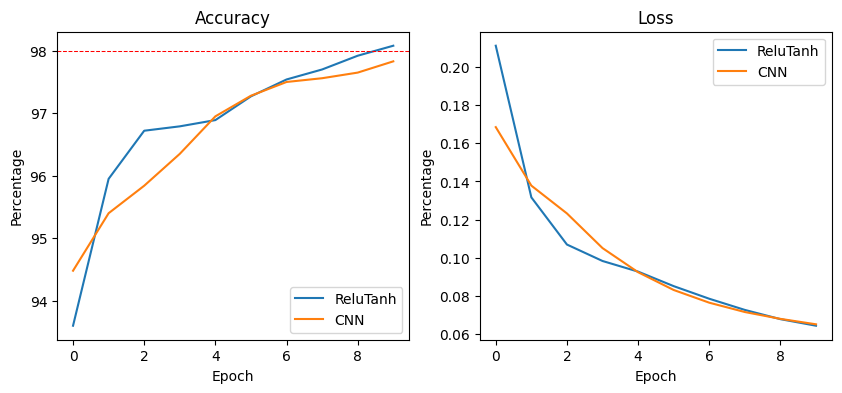

In [44]:
fig = plt.figure(figsize=(10,4))
plt.subplot(121)
# plt.plot(accuracies, label="default")
# plt.plot(accuraciesSNN, label="SNN")
# plt.plot(accuraciesDNN, label="DNN")
# plt.plot(accuraciesSigmoid, label="Sigmoid")
# plt.plot(accuraciesTanh, label="Tanh")
# plt.plot(accuraciesSimpleNN, label="Simple")
plt.plot(aReluTanh, label="ReluTanh")
# plt.plot(a64, label="NN64")
# plt.plot(aTDNN3, label="TanhDNN3")
# plt.plot(aTDNN4, label="TanhDNN4")
# plt.plot(aTDNN5, label="TanhDNN5")
# plt.plot(aTDNN6, label="TanhDNN6")
plt.plot(accuraciesCNN, label="CNN")
plt.legend()
plt.axhline(y=98, color='r', linestyle='--', linewidth=0.75)
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Percentage")
plt.subplot(122)
# plt.plot(losses, label="default")
# plt.plot(lossesSNN, label="SNN")
# plt.plot(lossesDNN, label="DNN")
# plt.plot(lossesSigmoid, label="Sigmoid")
# plt.plot(lossesTanh, label="Tanh")
# plt.plot(lossesSimpleNN, label="Simple")
plt.plot(lReluTanh, label="ReluTanh")
# plt.plot(l64, label="NN64")
# plt.plot(lTDNN3, label="TanhDNN3")
# plt.plot(lTDNN4, label="TanhDNN4")
# plt.plot(lTDNN5, label="TanhDNN5")
# plt.plot(lTDNN6, label="TanhDNN6")
plt.plot(lossesCNN, label="CNN")
plt.legend()
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Percentage")

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
CNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (conv1): Sequential(
    (0): Conv2d(1, 7, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=343, out_features=10, bias=True)
)
Epoch 1
-------------------------------
loss: 2.344361  [   64/60000]
loss: 0.432165  [ 6464/60000]
loss: 0.259791  [12864/60000]
loss: 0.270553  [19264/60000]
loss: 0.159400  [25664/60000]
loss: 0.237052  [32064/60000]
loss: 0.141149  [38464/60000]
loss: 0.389296  [44864/60000]
loss: 0.295342  [51264/60000]
loss: 0.272752  [57664/60000]
Test Error: 
 Accuracy: 95.9%, Avg loss: 0.129811 

Epoch 2
-------------------------------
loss: 0.178974  [   64/60000]
loss: 0.171989  [ 6464/60000]
loss: 0.170438  [12864/60000]
loss: 0.196873  [19264/60000]
loss: 0.086908  [25664/60000]
loss: 0.10

Text(0, 0.5, 'Percentage')

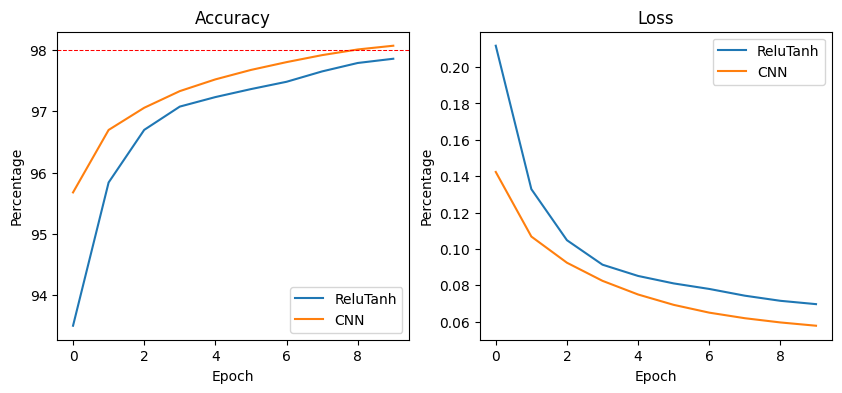

In [47]:
mACNN = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
mLCNN = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
mART = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
mLRT = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
for i in range(10):
    aTemp, lTemp = main(CNN().to(device))
    mACNN += aTemp
    mLCNN += lTemp

    aTemp, lTemp = main(NNReluTanh().to(device))
    mART += aTemp
    mLRT +=lTemp

mACNN /= 10
mLCNN /= 10
mART /= 10
mLRT /= 10

Text(0, 0.5, 'Percentage')

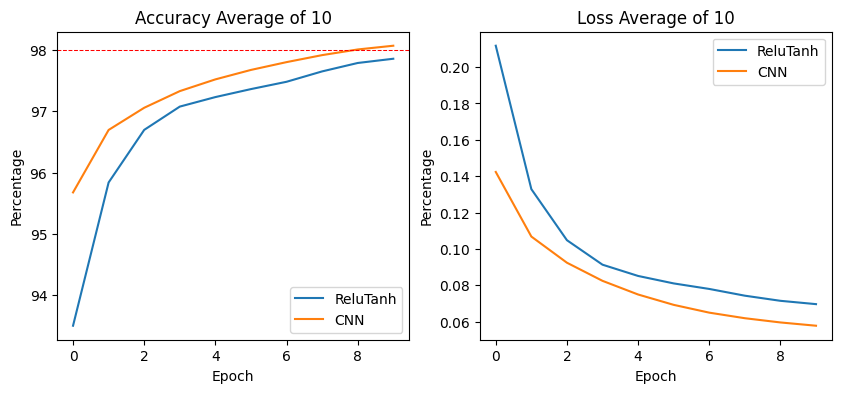

In [50]:
fig = plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(mART, label="ReluTanh")
plt.plot(mACNN, label="CNN")
plt.legend()
plt.axhline(y=98, color='r', linestyle='--', linewidth=0.75)
plt.title("Accuracy Average of 10")
plt.xlabel("Epoch")
plt.ylabel("Percentage")
plt.subplot(122)
plt.plot(mLRT, label="ReluTanh")
plt.plot(mLCNN, label="CNN")
plt.legend()
plt.title("Loss Average of 10")
plt.xlabel("Epoch")
plt.ylabel("Percentage")

In [51]:
model = CNN()
# Count the number of parameters
total_params = sum(p.numel() for p in model.parameters())
print(f'Total number of parameters: {total_params}')

Total number of parameters: 3622


In [52]:
model = NNReluTanh()
# Count the number of parameters
total_params = sum(p.numel() for p in model.parameters())
print(f'Total number of parameters: {total_params}')

Total number of parameters: 669706
